In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import numpy as np
from numpy import load

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

from numpy import mean
from numpy import std
from keras import backend as k
from keras.models import Model

from sklearn.model_selection import KFold


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()


In [2]:
def load_data():
    X_train = load('X_train.npy')
    X_test = load('X_test.npy')
    y_train = load('y_train.npy')
    y_test = load('y_test.npy')
    
    return (X_train, X_test), (y_train, y_test)

In [3]:
(X_train, X_test), (y_train, y_test) = load_data()

# look at her again, then look at the data images
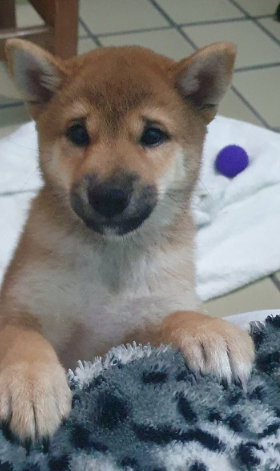

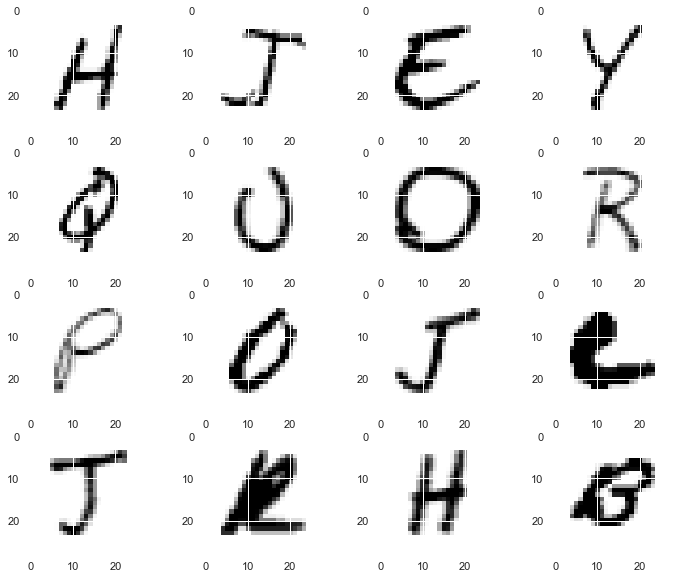

In [4]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [5]:
print('x_train shape ', X_train.shape)
print('x test shape ', X_test.shape)
print('y train shape ', y_train.shape)
print('y test shape ', y_test.shape)

x_train shape  (279337, 28, 28, 1)
x test shape  (93113, 28, 28, 1)
y train shape  (279337, 26)
y test shape  (93113, 26)


### Com entrada, uma CNN pega um tensor de formato, nesse caso (altura, largura, canal de cor) ignorando o tamanho da base.  

### As camadas de Conv2D e MaxPooling2D são tensores 3D de formato (altura, largura, canal(RGB, etc...) ). As dimensões da alture e largura tendem a encolher a cada vez que fazemos o foward e nos aprofundamos na rede. O  numero de canais de output para cada camada Conv2D é controlado pelo primeiro argumento (ex: 32 ou 64). 
****************************

### A camada Conv2d que convolve a imagem usando 32 filtros de cada tamanho (3 * 3). 
###  uma camada Conv2D que também é usada para convolver a imagem e está usando 64 filtros de cada tamanho (3 * 3). 
### A camada  MaxPooling2D que escolhe o valor máximo de uma matriz de tamanho (3 * 3). 
### A outra camada está achatando a saída obtida da camada 4 e essa saída achatada é passada para a camada 6.
### A camada ultima é a camada de saída com 10 neurônios para 10 classes de saída que está usando a função softmax.

In [6]:
cls = Sequential([], 'Kendall_Jenner')
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(26, activation='softmax')) # 26 letras no alfabeto carreiro 🤠

cls.summary()

Model: "Kendall_Jenner"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
______________________________________________

In [7]:
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 21s - loss: 0.2317 - accuracy: 0.9357 - val_loss: 0.0948 - val_accuracy: 0.9741
Epoch 2/18
1397/1397 - 5s - loss: 0.0890 - accuracy: 0.9747 - val_loss: 0.0742 - val_accuracy: 0.9806
Epoch 3/18
1397/1397 - 5s - loss: 0.0677 - accuracy: 0.9806 - val_loss: 0.0636 - val_accuracy: 0.9839
Epoch 4/18
1397/1397 - 5s - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.0570 - val_accuracy: 0.9858
Epoch 5/18
1397/1397 - 5s - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0543 - val_accuracy: 0.9868
Epoch 6/18
1397/1397 - 5s - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0508 - val_accuracy: 0.9885
Epoch 7/18
1397/1397 - 5s - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0522 - val_accuracy: 0.9882
Epoch 8/18
1397/1397 - 5s - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0480 - val_accuracy: 0.9902
Epoch 9/18
1397/1397 - 5s - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0560 - val_accuracy: 0.9880
Epoch 10/18
1397/1397 - 5s - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0461 -

# Thunder Cross splito validation
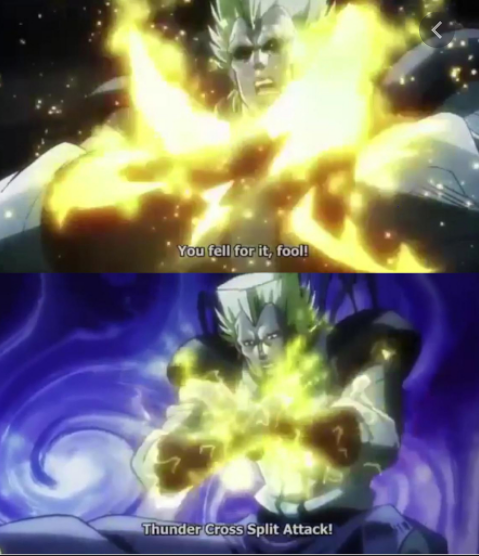

In [8]:
def create_skynet(summary=False):
    cls = Sequential([], 'Kendall_Jenner')
    cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    cls.add(MaxPooling2D(pool_size=(2, 2)))
    cls.add(Dropout(0.3))
    cls.add(Flatten())
    cls.add(Dense(128, activation='relu'))
    cls.add(Dense(26, activation='softmax')) # 26 letras no alfabeto carreiro 🤠

    if summary:
        cls.summary()
    
    return cls
    

In [9]:
def evaluate_model(X, y, n_folds=5):
    scores, histories = list(), list()
    # finge que vai atacar com os pé
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # FOOL YOU FELL FOR IT
    for train_ix, test_ix in kfold.split(X):
        # define model
        model = create_skynet()
        # select rows for train and test
        trainX, trainY, testX, testY = X[train_ix], y[train_ix], X[test_ix], y[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [10]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.show()

In [11]:
def queimar_silicio(x_train, y_train, x_test, y_test):
    # load dataset
    # evaluate model
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    scores, histories = evaluate_model(X, y)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

In [12]:
queimar_silicio(X_train, y_train, X_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Famoso cutuvelo do erro
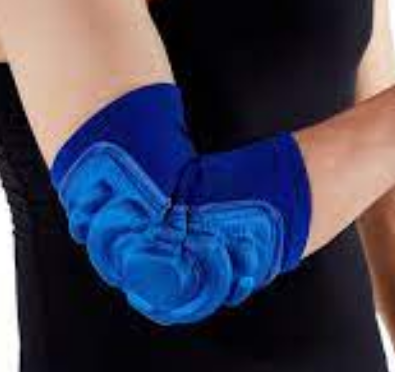

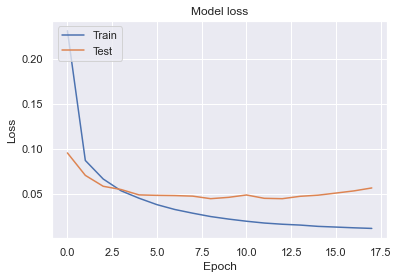

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

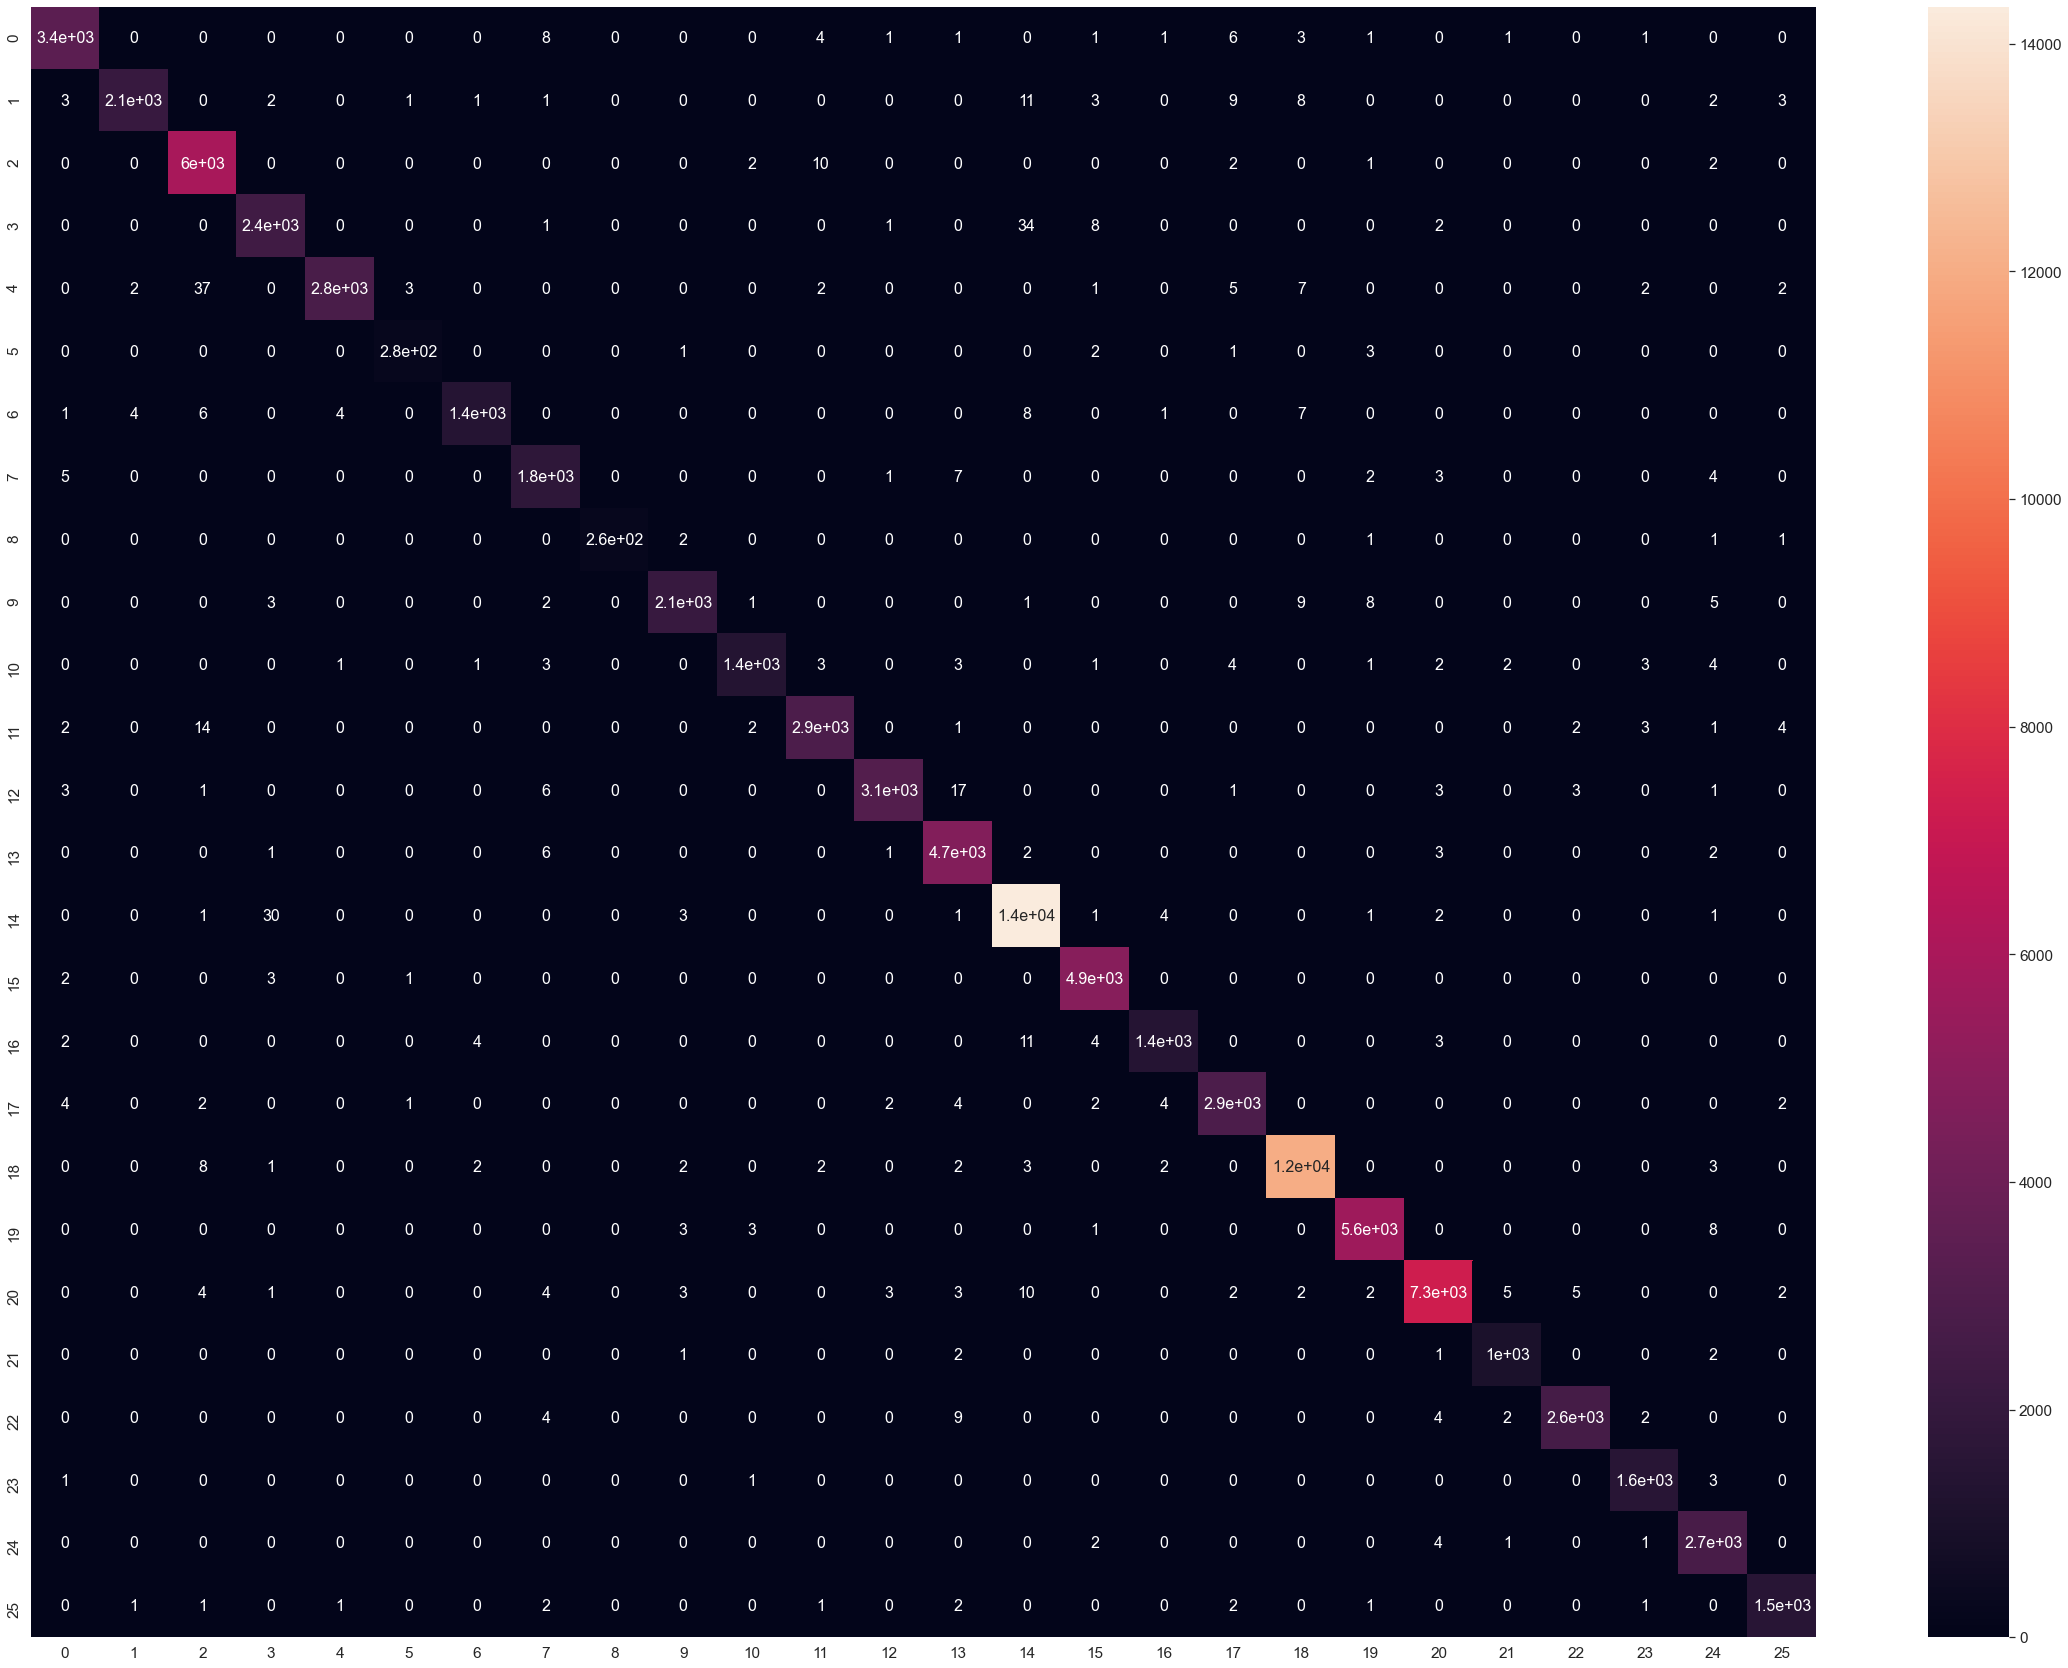

In [35]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (40,30))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.savefig('matriz_confusao_preste_atencao.png')


## Vemos que está massa a matriz, então guardo a quentinha


In [39]:
from tensorflow.keras.models import load_model
cls.save("model.h5")
print("Saved model to disk")
 
# load model
model = load_model('model.h5')

AttributeError: module 'h5py' has no attribute 'File'